This notebook is working on the seeps_detection dataset.
Data must be organised into two folders, train_images_256 and train_masks_256, 
which are the pictures and masks respectively. 

This is an image segmentation exercise solved with a CNN architecture. The model used is a unet mini CNN


In [70]:
import keras 
import keras_segmentation
import numpy as np
from os import listdir
import matplotlib.image as img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [92]:
#Input data and convert to array. Convert to rgb format to work with model, setting r=g=b.
X_data = np.zeros((790,256,256,3))
y_data = np.zeros((790,256,256,3))
i = 0

for filename in listdir(r"C:\Users\Administrator\Desktop\seep_detection\train_images_256"):
    img_Xdata=img.imread("C:\\Users\\Administrator\\Desktop\\seep_detection\\train_images_256\\" + filename)
    img_Ydata=img.imread("C:\\Users\\Administrator\\Desktop\\seep_detection\\train_masks_256\\" + filename)
    X_data[i,:,:,0]=X_data[i,:,:,1]=X_data[i,:,:,2]=img_Xdata
    y_data[i,:,:,0]=y_data[i,:,:,1]=y_data[i,:,:,2]=img_Ydata
    i+=1


In [64]:
#There are 8 classes: 0 is non-seep, 1-7 are seep.
classes = np.unique(y_data)
nClasses = len(classes)
print('Number of classes: ',nClasses)
print('Classes: ', classes)

#Format data to work with model.
X_data = X_data.astype(np.float32) / 65536.
y_data = y_data.astype('uint8')


Number of classes:  8
Classes:  [0. 1. 2. 3. 4. 5. 6. 7.]


In [65]:
#Split data into train, cross validation and test. Train:val:test ratio chosen is 0.6:0.2:0.2

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)  #0.25 * 0.8 = 0.2



In [66]:
#Save images to separate folders in png format.
for i in range(X_train.shape[0]):
    img.imsave("C:\\Users\\Administrator\\Desktop\\dataset\\train_image\\" + str(i) + ".png",X_train[i,:,:])
    img.imsave("C:\\Users\\Administrator\\Desktop\\dataset\\train_mask\\" + str(i) + ".png",y_train[i,:,:])

for i in range(X_val.shape[0]):
    img.imsave("C:\\Users\\Administrator\\Desktop\\dataset\\val_image\\" + str(i) + ".png",X_val[i,:,:])
    img.imsave("C:\\Users\\Administrator\\Desktop\\dataset\\val_mask\\" + str(i) + ".png",y_val[i,:,:])

for i in range(X_test.shape[0]):
    img.imsave("C:\\Users\\Administrator\\Desktop\\dataset\\test_image\\" + str(i) + ".png",X_test[i,:,:])
    img.imsave("C:\\Users\\Administrator\\Desktop\\dataset\\test_mask\\" + str(i) + ".png",y_test[i,:,:])
    

Architecture of unet_mini can be found here: https://github.com/divamgupta/image-segmentation-keras/blob/master/keras_segmentation/models/unet.py


In [67]:
#Import model. unet_mini is a basic vanilla cnn and is being used here for time efficiency.
from keras_segmentation.models.unet import unet_mini

model = unet_mini(n_classes=8 ,  input_height=256, input_width=256  )

In [68]:
#Train model. Number of epochs is set to 5 as default.
model.train(train_images = "C:\\Users\\Administrator\\Desktop\\dataset\\train_image\\",
            train_annotations = "C:\\Users\\Administrator\\Desktop\\dataset\\train_mask\\",
            verify_dataset  = False,
            validate = True,
            val_images = "C:\\Users\\Administrator\\Desktop\\dataset\\val_image\\",
            val_annotations = "C:\\Users\\Administrator\\Desktop\\dataset\\val_mask\\",
            checkpoints_path = "C:\\Users\\Administrator\\Desktop\\dataset\\weights\\"
    )

Epoch 1/5
512/512 [==============================] - 1719s 3s/step - loss: 2.4834 - accuracy: 0.3946 - val_loss: 0.2790 - val_accuracy: 0.9673
Epoch 2/5
512/512 [==============================] - 1677s 3s/step - loss: 0.3410 - accuracy: 0.9541 - val_loss: 0.2448 - val_accuracy: 0.9778
Epoch 3/5
512/512 [==============================] - 1671s 3s/step - loss: 0.2804 - accuracy: 0.9693 - val_loss: 0.2026 - val_accuracy: 0.9794
Epoch 4/5
512/512 [==============================] - 1673s 3s/step - loss: 0.2479 - accuracy: 0.9711 - val_loss: 0.1775 - val_accuracy: 0.9802
Epoch 5/5
512/512 [==============================] - 1674s 3s/step - loss: 0.2283 - accuracy: 0.9727 - val_loss: 0.1652 - val_accuracy: 0.9805


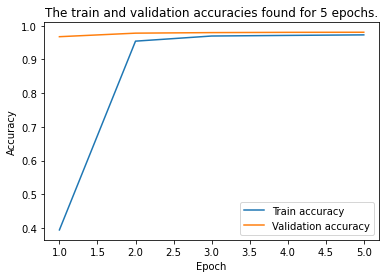

In [71]:
#Accuracy plot
t = [1,2,3,4,5]
train_acc = [0.3946,0.9541,0.9693,0.9711,0.9727]
val_acc = [0.9673,0.9778,0.9794,0.9802,0.9805]
plt.plot(t,train_acc,label = 'Train accuracy')
plt.plot(t,val_acc,label= 'Validation accuracy')
plt.title('The train and validation accuracies found for 5 epochs.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

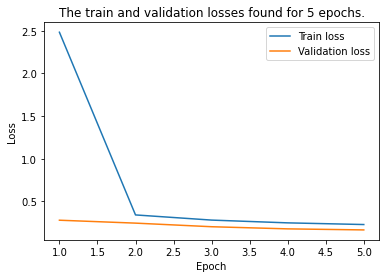

In [72]:
#Loss plot
train_loss = [2.4834,0.3410,0.2804,0.2479,0.2283]
val_loss = [0.2790,0.2448,0.2026,0.1775,0.1652]
plt.plot(t,train_loss,label = 'Train loss')
plt.plot(t,val_loss,label= 'Validation loss')
plt.title('The train and validation losses found for 5 epochs.')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Make predictions on test data
predict_multiple(model = model,
                 inp_dir="C:\\Users\\Administrator\\Desktop\\dataset\\test_image\\",
                 checkpoints_path= "C:\\Users\\Administrator\\Desktop\\dataset\\weights\\",
                out_dir = "C:\\Users\\Administrator\\Desktop\\dataset\\test_prediction\\")

In [91]:
#Evaluate model using IoU metric
ev = model.evaluate_segmentation(inp_images_dir="C:\\Users\\Administrator\\Desktop\\dataset\\test_image\\",
                              annotations_dir="C:\\Users\\Administrator\\Desktop\\dataset\\test_mask\\",
                   checkpoints_path = "C:\\Users\\Administrator\\Desktop\\dataset\\weights\\")

158it [01:00,  2.62it/s]


In [83]:
print(ev)

{'frequency_weighted_IU': 0.96518902468419, 'mean_IU': 0.12292195302107582, 'class_wise_IU': array([9.81697645e-01, 9.02158533e-04, 3.95621786e-04, 0.00000000e+00,
       3.80199224e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])}


These IoU metric results, along with the predictions, show that the model does not generalise well, and displays poor performance at classifying seeps within the data. The pixel accuracy is rather high, however this data has a large class imbalance. Hence a prediction of all pixel class = 0 would yield very high accuracy. The IoU metric finds the ratio of the area of intersection to the area of union, and thus provides a more effective measurement for evaluating segmentation models.  The IoU metric shows that for classes of seep (1:7), the IoU is very small and hence the model has not succeeded at detecting seeps. 